In [25]:
# General libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import sort_dataframeby_monthorweek as sd
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [26]:
df = pd.read_csv('hotel_bookings.csv', parse_dates=['reservation_status_date'])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id = '5.0'></a>
<p style = "font-size : 34px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Checking Info & Null Values</strong></p> 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


                                null_values: prcnt_null
hotel                                      0       0.0%
is_canceled                                0       0.0%
lead_time                                  0       0.0%
arrival_date_year                          0       0.0%
arrival_date_month                         0       0.0%
arrival_date_week_number                   0       0.0%
arrival_date_day_of_month                  0       0.0%
stays_in_weekend_nights                    0       0.0%
stays_in_week_nights                       0       0.0%
adults                                     0       0.0%
children                                   4       0.0%
babies                                     0       0.0%
meal                                       0       0.0%
country                                  488       0.4%
market_segment                             0       0.0%
distribution_channel                       0       0.0%
is_repeated_guest                          0    

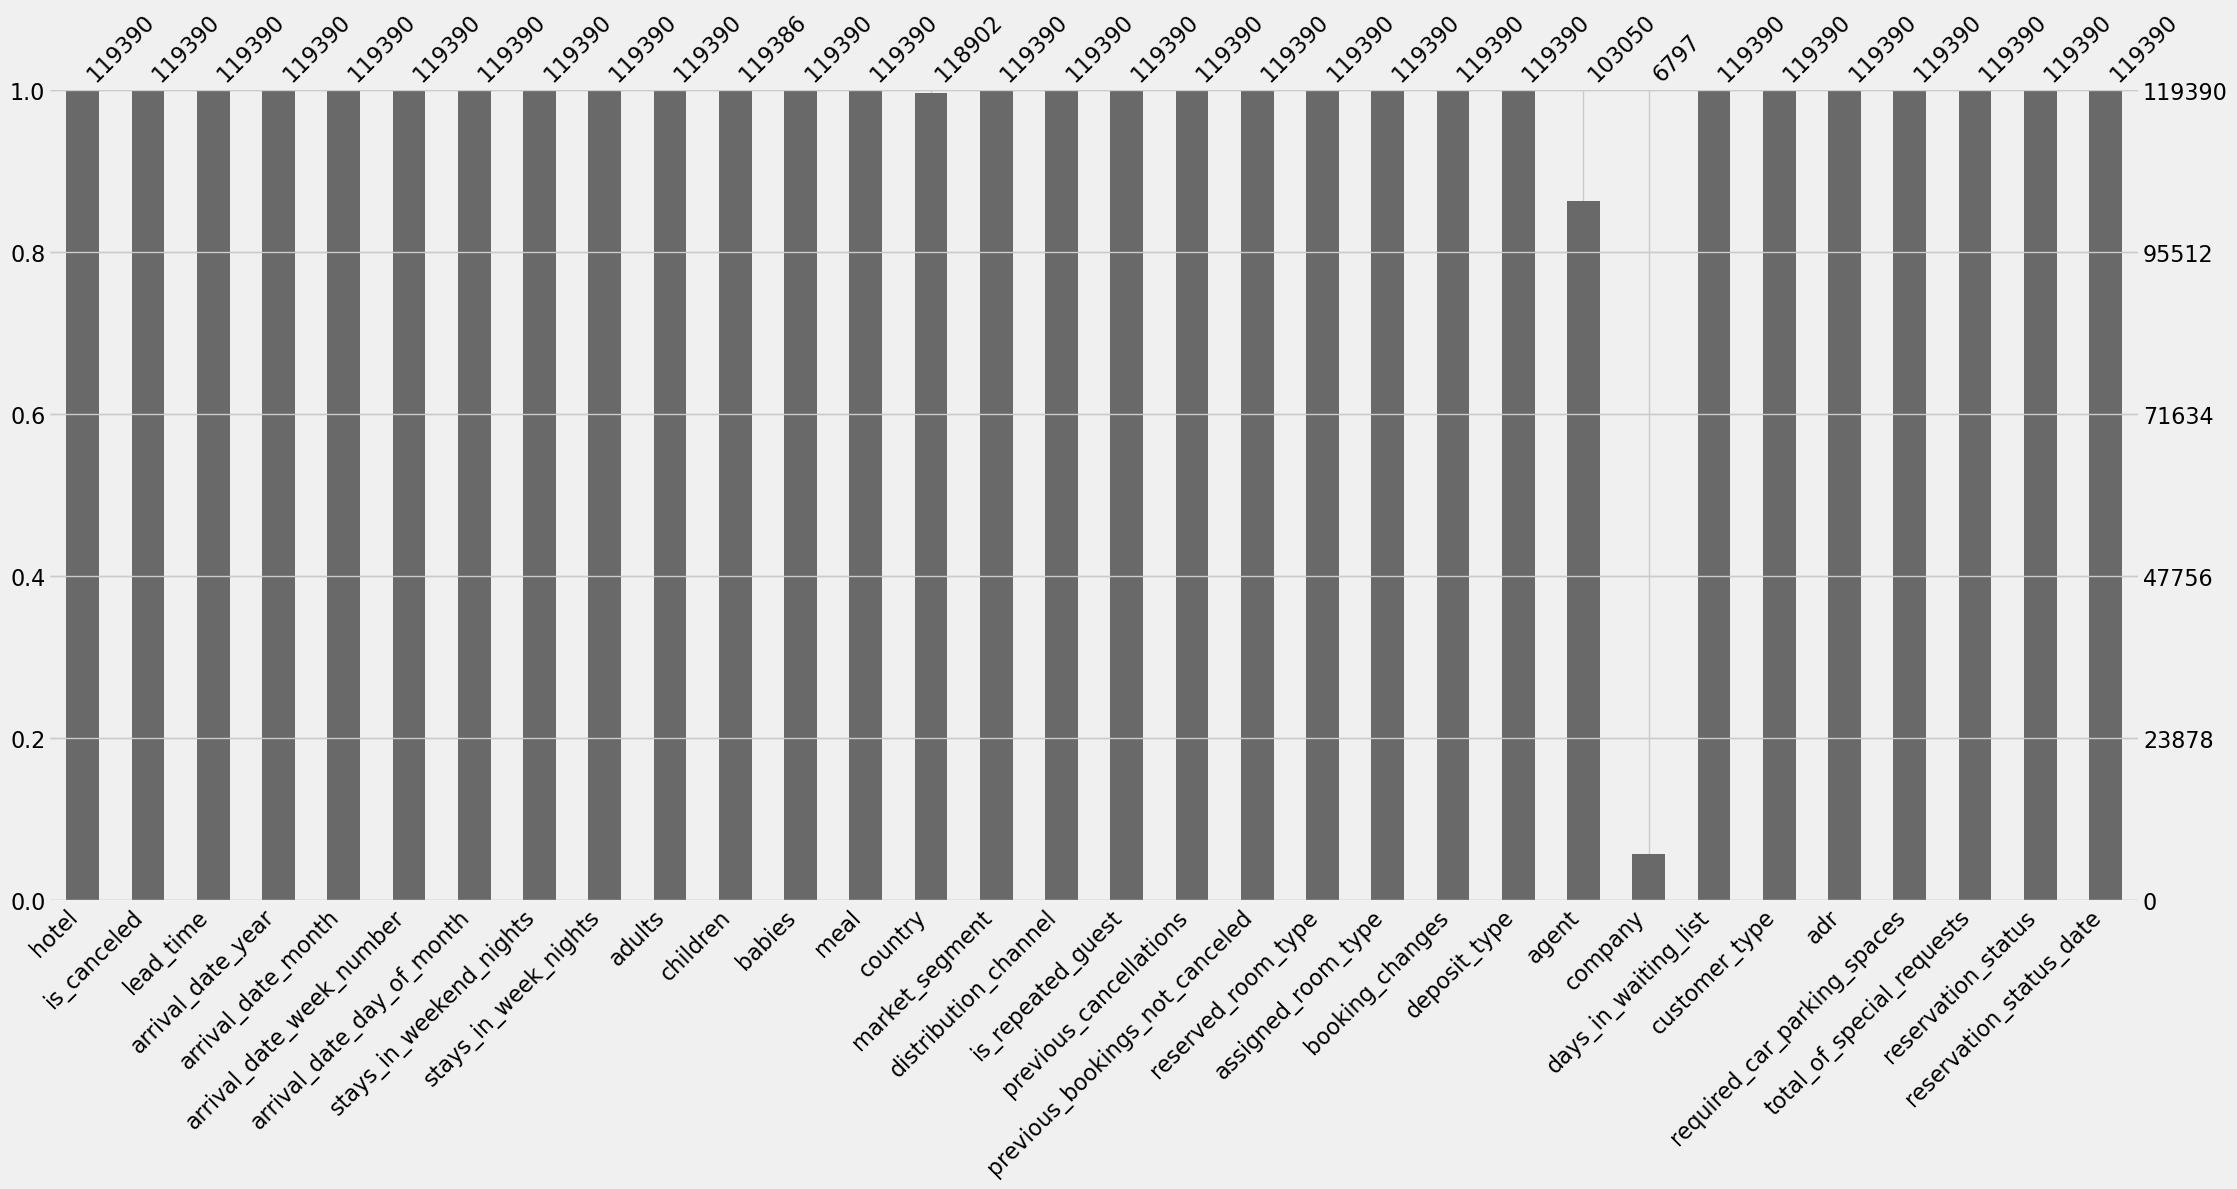

In [29]:
null = pd.DataFrame({'null_values:' : df.isna().sum(), 'prcnt_null' : (df.isna().sum() / len(df) * (100)).round(1).astype(str) + '%'})
print(null)

msno.bar(df)
plt.show()

<a id = '5.0'></a>
<p style = "font-size : 34px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; #808080; border-radius: 5px 5px;"><strong>Data Cleaning & Filtering</strong></p> 

In [30]:
df = df.fillna(0)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


                                null_values: prcnt_null
hotel                                      0       0.0%
is_canceled                                0       0.0%
lead_time                                  0       0.0%
arrival_date_year                          0       0.0%
arrival_date_month                         0       0.0%
arrival_date_week_number                   0       0.0%
arrival_date_day_of_month                  0       0.0%
stays_in_weekend_nights                    0       0.0%
stays_in_week_nights                       0       0.0%
adults                                     0       0.0%
children                                   0       0.0%
babies                                     0       0.0%
meal                                       0       0.0%
country                                    0       0.0%
market_segment                             0       0.0%
distribution_channel                       0       0.0%
is_repeated_guest                          0    

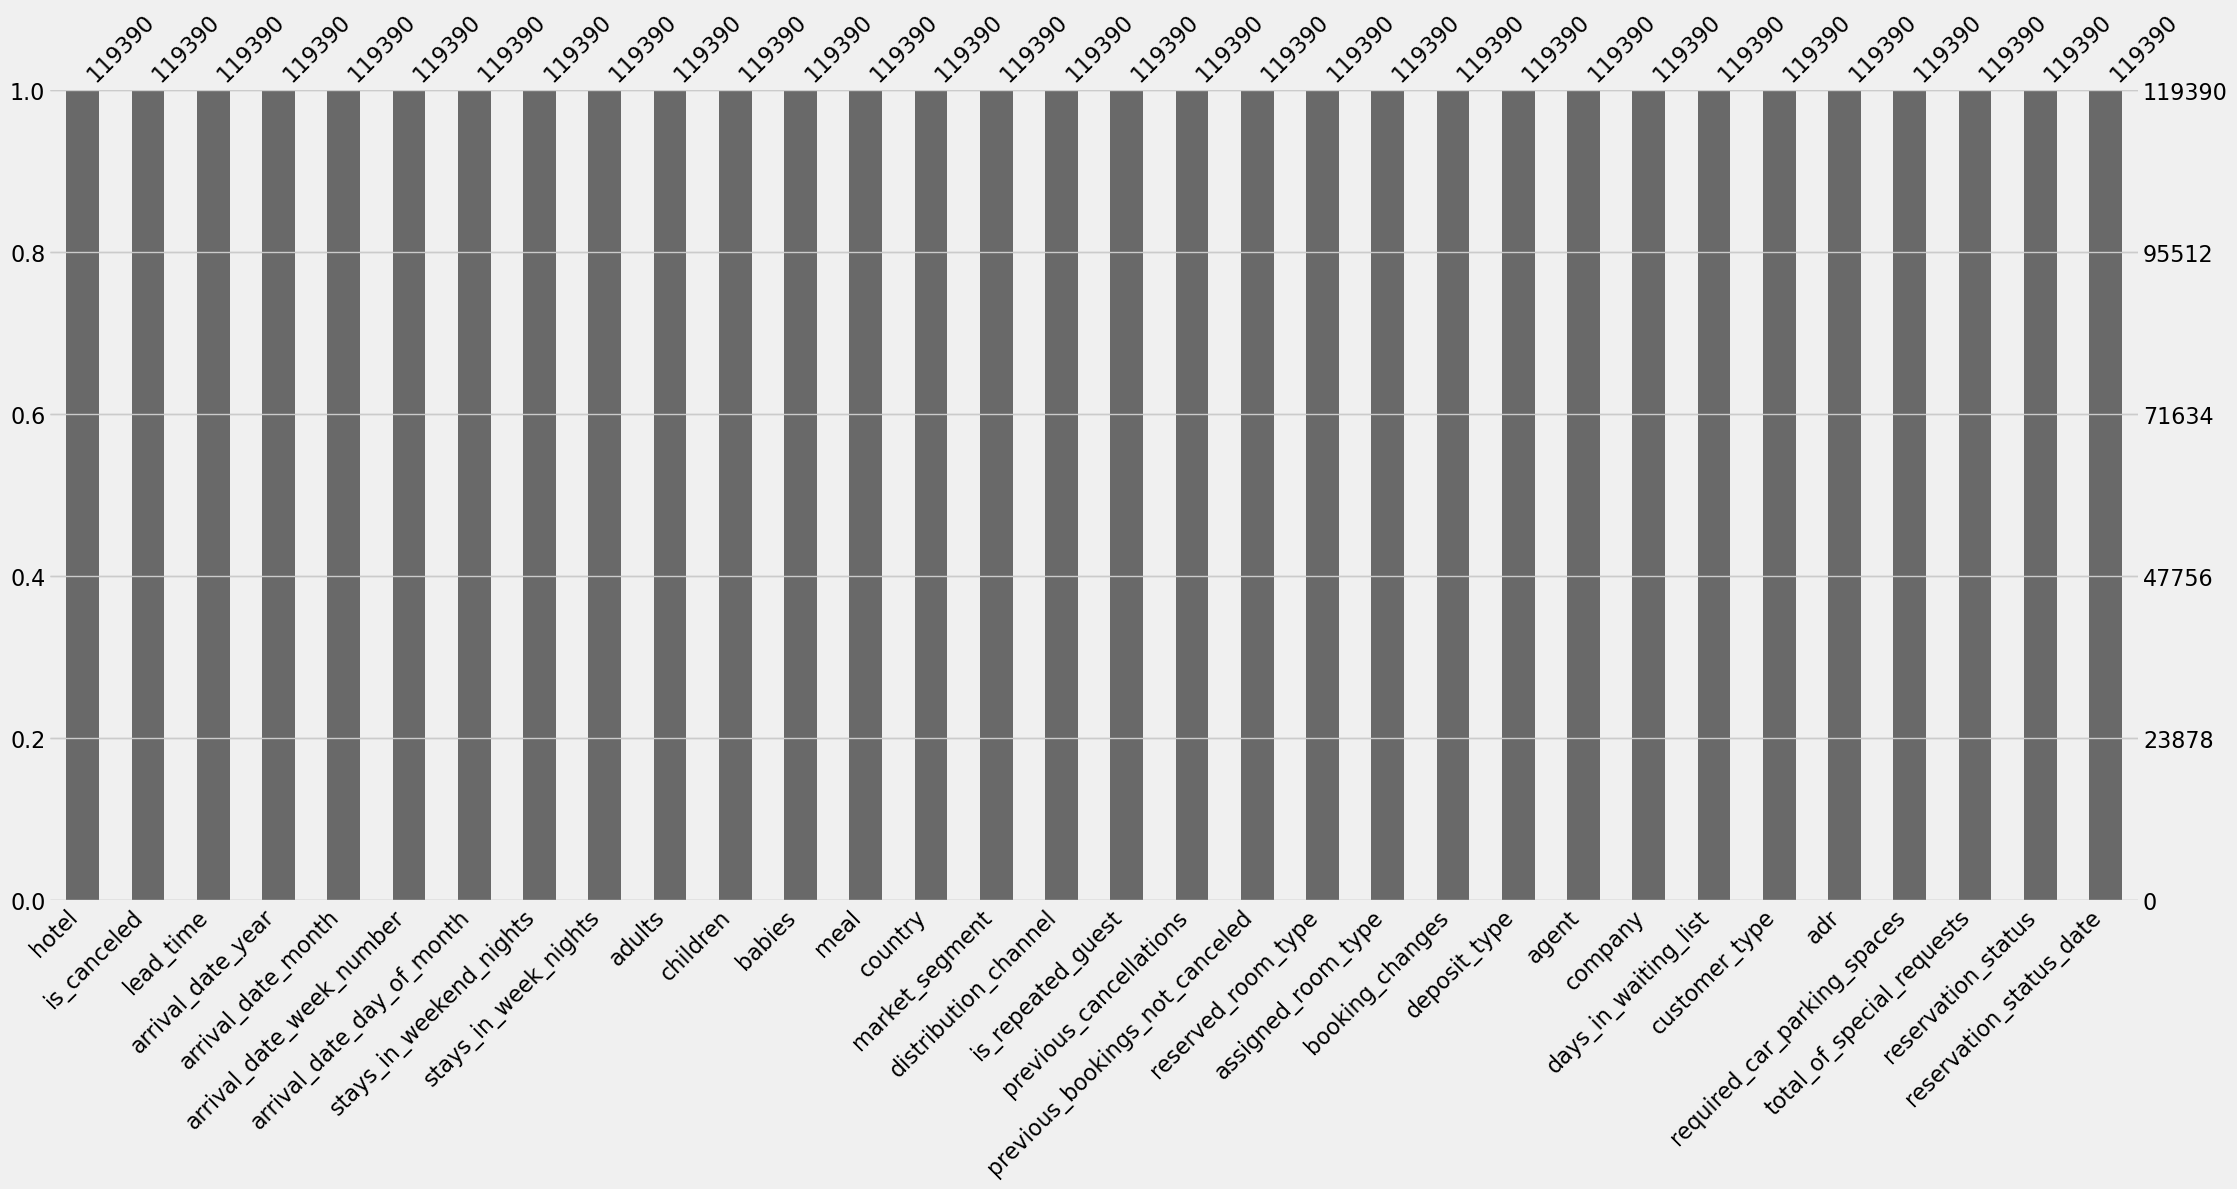

In [31]:
null = pd.DataFrame({'null_values:' : df.isna().sum(), 'prcnt_null' : (df.isna().sum() / len(df) * (100)).round(1).astype(str) + '%'})
print(null)

msno.bar(df)
plt.show()

<a id = '5.0'></a>
<p style = "font-size : 20px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Filtering out those with 0 values on visitor columns & making filters for those who didn't cancel booking</strong></p> 

In [32]:

def sort_month(df, mon_col):
    return sd.Sort_Dataframeby_Month(df, mon_col)

filter = (df.babies == 0) & (df.adults == 0) & (df.children == 0)
df = df[~filter]

data = df[df['is_canceled'] == 0]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


<a id = '5.0'></a>
<p style = "font-size : 50px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>EDA</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Q1 : From which country do most of our guests come from?</strong></p> 

In [33]:

country_wise_guests = data['country'].value_counts().reset_index()
country_wise_guests.columns=('country', 'guest_count')
print(country_wise_guests)

basemap = folium.Map()
guest_map = px.choropleth(country_wise_guests, locations='country', color='guest_count', hover_name='country')
guest_map.show()

    country  guest_count
0       PRT        20977
1       GBR         9668
2       FRA         8468
3       ESP         6383
4       DEU         6067
..      ...          ...
161     BHR            1
162     DJI            1
163     MLI            1
164     NPL            1
165     FRO            1

[166 rows x 2 columns]


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Q2 : How much do guests pay for room per night?</strong></p> 

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Price Per Room Type</strong></p> 

In [34]:
# Rates Per Room - The Price is affected depending on time, season, availability, room type & meals etc.

px.box(data, x='reserved_room_type', y='adr', template='plotly_dark', color='hotel', category_orders={'reserved_room_type': ['A','B','C','D','E','F','G','H','L']})

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Room price over the Months</strong></p> 

In [35]:

price = data.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
price = sort_month(price, 'arrival_date_month')
plt.figure(figsize=(17,8))
px.bar(price, x='arrival_date_month', y='adr', color='hotel', template='plotly_dark', barmode='group', title='Room Price/Night Over the Months')

<Figure size 1700x800 with 0 Axes>

<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Q3 : Which are the most busy months?</strong></p> 

In [36]:

guest = data.groupby(['hotel', 'arrival_date_month']).count().reset_index().iloc[:, :3]
guest.columns=['hotel','month','count']
guest = sort_month(guest, 'month')

px.line(guest, x='month', y='count', color='hotel', template='plotly_dark', title='Guest Count Per Hotel Over The Months')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center;border-radius: 5px 5px;"><strong>Q4: Revenue over the years?</strong></p> 

In [37]:

rev2015 = data[data['arrival_date_year'] == 2015]
rev2015 = rev2015.groupby(['hotel', 'arrival_date_month'])['adr'].sum().reset_index().rename(columns={'arrival_date_month': 'month'})
rev2015 = sort_month(rev2015, 'month')

rev2016 = data[data['arrival_date_year'] == 2016]
rev2016 = rev2016.groupby(['hotel', 'arrival_date_month'])['adr'].sum().reset_index().rename(columns={'arrival_date_month': 'month'})
rev2016 = sort_month(rev2016, 'month')

rev2017 = data[data['arrival_date_year'] == 2017]
rev2017 = rev2017.groupby(['hotel', 'arrival_date_month'])['adr'].sum().reset_index().rename(columns={'arrival_date_month': 'month'})
rev2017 = sort_month(rev2017, 'month')

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Revenue Over The Months on 2015</strong></p> 

In [38]:

px.bar(rev2015 , x='month', y='adr', color='hotel', barmode='group', template='plotly_dark')

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Revenue Over The Months on 2016</strong></p> 

In [39]:

px.bar(rev2016 , x='month', y='adr', color='hotel', barmode='group', template='plotly_dark')

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;">
<strong>Revenue Over The Months on 2017</strong></p> 

In [40]:

px.bar(rev2017 , x='month', y='adr', color='hotel', barmode='group', title='Revenue Over The Months on 2017', template='plotly_dark')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Q5: How long do people stay in either hotels</strong></p> 

In [41]:

data['total_nights'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
stay = data.groupby(['hotel', 'total_nights']).count().reset_index().iloc[:, :3].rename(columns={'is_canceled': 'visitor_stay_count'})

px.scatter(stay, x='total_nights', y='visitor_stay_count', color='hotel', template='plotly_dark')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Q6 : Cancellation rate?</strong></p> 

In [42]:

cancellation = df.groupby('is_canceled').count().reset_index().iloc[:, :2].rename(columns={'hotel' : 'count'})
cancellation['is_canceled'] = cancellation['is_canceled'].map({0 : 'Didnt Cancel', 1 : 'Cancelled'})
cancellation['percentage'] = (100 * cancellation['count'] / cancellation['count'].sum()).round(1).astype(str) + '%'
print("Conclusion: \n They cancel...A LOT! later we'll find out why")

px.bar(cancellation, x='is_canceled', y='count', text='percentage', color='is_canceled', template='plotly_dark', title='Cancellation Rate')

Conclusion: 
 They cancel...A LOT! later we'll find out why


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center;border-radius: 5px 5px;">
<strong>Q7 : Waiting List & Lead Time - how does it affect cancellation/booking?</strong></p> 

<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center;border-radius: 5px 5px;">
<strong>Days In Waiting List - Number of days from when the booking was listed to the day of confirmation</strong></p> 

In [43]:
# Cancellation/Booking rate for Waiting time & How long is the optimal response time to prevent losing customers

wait = df.groupby(['is_canceled'])['days_in_waiting_list'].mean().reset_index()
wait['is_canceled'] = wait['is_canceled'].map({0: 'Didnt Cancel', 1: 'Cancelled'})
print('As much as possible, provide a response within 24-36hrs')

px.bar(wait, x='is_canceled', y='days_in_waiting_list',text='days_in_waiting_list', title='Average Days In Waiting List', template='plotly_dark', color='is_canceled')

As much as possible, provide a response within 24-36hrs


<p style = "font-size : 23px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center;border-radius: 5px 5px;">
<strong>Lead time - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</strong></p> 

In [44]:

lead = df.groupby('is_canceled')['lead_time'].mean().reset_index().iloc[:, :2].rename(columns={'lead_time': 'avg_lead_time (days)'})
lead['is_canceled'] = lead['is_canceled'].map({0 : 'Didnt Cancel', 1 : 'Canceled'})
print('Longer lead times will likely lead to cancellation due to various reasons like personal, work, health etc.')

px.bar(lead, x='is_canceled', y='avg_lead_time (days)', color='is_canceled', title='Avg_lead_time : Cancellation correlation', text='avg_lead_time (days)', template='plotly_dark')

Longer lead times will likely lead to cancellation due to various reasons like personal, work, health etc.


In [45]:

lead2 = df.groupby(['is_canceled','arrival_date_month'])['lead_time'].mean().reset_index().rename(columns={'arrival_date_month': 'month'})
lead2['is_canceled'] = lead2['is_canceled'].map({0 : 'Didnt Cancel', 1 : 'Cancelled'})
lead2 = sort_month(lead2, 'month')

px.bar(lead2, x='month', y='lead_time', template='plotly_dark', color='is_canceled', barmode='group', title='Avg Lead Time Over The Months')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Q8 : Engagement-Booking&Cancellation Correlation</strong></p> 

In [46]:
# Does Engagement(acquiesing to all/most of customer's special request) helps prevent booking cancellation?

engagement = df.groupby('is_canceled')['total_of_special_requests'].mean().reset_index().rename(columns={'total_of_special_requests': 'avg_special_req'})
engagement['is_canceled'] = engagement['is_canceled'].map({0 : 'Didnt Cancel', 1 : 'Cancelled'})
engagement['percentage'] = (100. * engagement['avg_special_req'] / engagement['avg_special_req'].sum()).round(1).astype(str) + '%'
print("This chart says that 'engagement is the key', but I think there's more to it")

px.bar(engagement, x='is_canceled', y='avg_special_req', color='is_canceled', text='percentage', template='plotly_dark', title='Engagement-Cancellation/Booking Correlation')

This chart says that 'engagement is the key', but I think there's more to it


<p style = "font-size : 23px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center;border-radius: 5px 5px;">
<strong>In the chart below, The rate for people who are 'no-show' are higher than those who outright cancel their bookings. So while 'engagement is key', it won't always be effective</strong></p> 

In [47]:
# Chart Shows that while meeting customer's needs/requests provide better results, not all of them proceed with their booking

status = df.groupby(['is_canceled', 'reservation_status'])['total_of_special_requests'].mean().reset_index().rename(columns={'total_of_special_requests' : 'avg_spec_req'})
status['percentage'] = (100. * status['avg_spec_req'] / status['avg_spec_req'].sum()).round(1).astype(str) + '%'
status['is_canceled'] = status['is_canceled'].map({0: 'Didnt Cancel', 1 : 'Cancelled'})

px.bar(status, x='reservation_status', y='avg_spec_req', text='percentage', color='is_canceled', template='plotly_dark')

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>1. Top 5 Countries where the customers come from : Portugal, UK, France, Spain, Germany</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>2. Average price over the months for: (resort hotel = €85) (city hotel = €102)</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 25px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : center; border-radius: 5px 5px;"><strong>Guest count are the highest on Summer where the prices are also the highest followed by Spring</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>3. For City Hotel, Revenue is high from May-October, While for Resort Hotel, revenue is stable Spring-Autumn & peaks from July-August</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>4. People generally only stay in hotels for 1-4 nights with the highest at 69</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>5. While they are still more of those who show up, there are still a lot who cancel bookings, few causes of cancellation include waiting for confirmation & lead times</strong></p> 

<a id = '5.0'></a>
<p style = "font-size : 35px; color : #cfcfcf ; font-family : 'Times New Roman'; text-align : left; border-radius: 5px 5px;"><strong>16. One way to prevent cancellation is by engaging with the customers. This makes the customers feel that their needs are being met. While the rates of those who make requests and still cancel are significantly high, those who proceed with their booking are still the majority</strong></p> 
